author : 
> Nabiel Husein Shihab / nabielshihab@hotmail.com

# **Atrificial Neural Networks dalam Python**
***

# Sedikit hal tentang Machine Learning

Sebelumya, kalian perlu tahu hubungan antara *Artificial Intelligence (AI)*, *machine learning*, *deep learning*, dan *artificial neural network (ANN)*. Gambar di bawah megilustrasikan hubungan mereka. Masih banyak orang yang belum tau hubungan tersebut.

<img src="Figures/ANN_1.png" width="700"/>


Dalam pemrograman klasik, kita akan memasukkan beberapa *rules* (program) dan data input yang akan diolah sesuai dengan *rules* tersebut untuk menghasilkan jawaban. tetapi dengan *machine learning*, kita memasukkan data input dan juga jawaban yang berkaitan dengan data tersebut untuk menghasilkan *rules* antara data input dan jawaban. *Rules* tersebut dapat diterapkan untuk data input yang baru untuk mendapatkan jawaban terhadap data input tersebut.
 
<img src="Figures/ANN_2.png" width="500"/>

Sistem *machine learning* adalah pelatihan, bukan diprogram secara eksplisit. Sistem tersebut akan dihidangkan beberapa contoh yang relevan untuk suatu tugas, lalu akan ditemukan struktur statistik dalam contoh-contoh tersebut yang pada akhirnya sistem akan menghasilkan *rules* untuk otomasi tugas tadi.

## Kenapa kita gunakan *deep Learning*? Apa itu *deep Learning*? 

*Deep Learning* tidak memerlukan pemahaman yang jelas mengenai mekanisme, output hanya tergantung pada bobot koneksi antara input dan output sistem, yang nilainya dapat diperoleh dari mempelajari data latihan. Metode ini sangat efektif dalam menyelesaikan *fuzzy problems* yang memiliki hukum inheren tertentu, tetapi mekanismenya belum jelas. *Deep learning* adalah salah satu bagian dalam *machine learning*. "*Deep*" di dalam *deep learning* tidak mengacu pada pemahaman lebih dalam apapun yang dicapai oleh pendekatan ini, sebenarnya ini mengacu pada lapisan-lapisan berturut-turut. Berapa banyak lapisan yang berkontribusi pada model data disebut *depth* dari model. Dalam *deep learning*, lapisan-lapisan tersebut akan dilatih melalui model yang disebut *neural network*. Istilah *neural network* mengacu ke neurobiologi, tetapi meskipun beberapa konsep sentral dalam *deep learning* dikembangkan sebagian dengan menggambar inspirasi dari pemahaman kita tentang otak, model *deep learning* bukanlah model dari otak. Tidak ada bukti bahwa otak mengimplementasikan sesuatu seperti mekanisme pembelajaran yang digunakan dalam model *deep learning*. Terdapat beberapa metode yang termasuk di dalam *deep learning*, salah satunya adalah *artificial neural networks (ANN)*.


## Bagaimana ANN bekerja?

Pola informasi dari dataset akan dimasukkan ke dalam *network* melalui *input neuron*, yang memicu lapisan *hidden neuron*, dan ini akan tiba di *output neuron*. 

<img src="Figures/ANN_3.png" width="700"/>

Tidak semua neuron "terpicu" sepanjang waktu. Setiap neuron menerima input dari neuron sebelah kiri, dan input dikalikan dengan bobot koneksi yang dilaluinya. Setiap neuron menjumlahkan semua input yang diterimanya dan jika jumlahnya lebih dari nilai ambang tertentu, neuron “terpicu” dan memicu neuron yang terhubung dengannya (neuron di sebelah kanannya). 

## Bagaimana ANN "belajar"?

Chollet (2018) menyatakan bahwa pelatihan model ANN berputar di sekitar objek – objek berikut:
1.	Lapisan – lapisan, yang dikombinasikan menjadi jaringan (network) atau model,
2.	Data input dan target yang sesuai,
3.	Loss function, kuantitas yang akan diminimalisir selama proses pembelajaran model berlangsung,
4.	Optimizer, menentukan bagaimana model akan diperbarui berdasarkan loss function. Optimizer mengimplementasikan varian spesifik dari penurunan gradien stokastik (SGD)

<img src="Figures/ANN_4.png" width="400"/>

Gambar di atas menggambarkan hubungan antara keempat objek tersebut. Model, yang terdiri dari beberapa lapisan yang terhubung satu sama lain, memetakan data input menjadi prediksi. Selanjutnya loss function akan membandingkan prediksi tersebut dengan target, menghasilkan loss value, ukuran seberapa baik prediksi model cocok dengan apa yang diekspektasikan. Optimizer menggunakan loss value tersebut untuk memperbarui bobot – bobot (weights) dalam model.


### Sources: 
1. Chollet, F. (2018): Deep learning with Python, Manning Publication
2. https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications

 # TENSORFLOW & KERAS

<img src="Figures/tensor_flow.png" width="500"/> <img src="Figures/keras.png" width="400"/>

kita dapat menggunakan *deep learning framework* untuk memudahkan menyelesaikan masalah menggunakan *deep learning*. `TensorFlow adalah salah satu framework untuk deep learning. Sedangkan Keras adalah library di Python yang dapat bekerja pada framework TensorFlow`. Istilah sederhananya Keras adalah *wrapper* dari TensorFlow. Keras ada untuk memudahkan kita karena Keras dapat dikatakan lebih *high-level* dibanding TensorFlow. Sebenarnya ada framework lain yang dapat menggunakan Keras, antara lain Theano dan CNTK. Keras dibuat dengan fokus memahami teknik *deep learning*, seperti menciptakan lapisan untuk *neural networks* mempertahankan konsep bentuk dan rincian matematika.

Untuk membuat *deep learning model* di Keras, kita dapat menggunakan tahapan-tahapan di bawah:
> 1. Load dataset kita (*features & labels*)
2. Preprocess dataset
3. Membuat dan melatih model ANN
4. Membuat prediksi dan mengevaluasi model ANN

***

# **`LET'S CODE`**

### Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense

# visualisasi template
plt.style.use('ggplot')
plt.rcParams["font.size"] = "15"

## 1. Load dataset kita 

Untuk latihan sekarang, kita akan menganalisa data customer suatu bank. Dalam periode waktu 6 bulan, bank tersebut mengamati apakah pelanggan-pelanggannya menginggalkan bank atau tetap. Tujuan kita adalah untuk membuat ANN yang dapat memprediksi, berdasarkan informasi geo-demografis dan transaksional yang diberikan, jika ada pelanggan individu yang akan meninggalkan bank atau tetap.

In [3]:
dataset = pd.read_csv('dataset\\Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# drop kolom yang tidak berguna sebagai feature
dataset = dataset.drop(['RowNumber', "CustomerId", "Surname"], axis=1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Preprocess dataset

Pada tahap ini akan dilakukan:
> **a. Encoding categorical variables** 

> **b. Split dataset menjadi train set dan test set**

> **c. Feature scaling**

### 2.1 Encoding categorigal variables
Pada dataset kita, terdapat dua atribut yang merupakan categorical variables, yaitu Geography dan Gender.

In [5]:
# label encoding untuk feature Gender
labelencoder_X = LabelEncoder()
dataset['Gender'] = labelencoder_X.fit_transform(dataset['Gender'])

# one hot encoding untuk feature Geography
onehotencoder = OneHotEncoder()

# membuat dummy variables untuk feature Geography.
# Reshape 1-D Geography array ke 2-D karena fit_transform meminta 2-D 
dummy_geography = onehotencoder.fit_transform(dataset["Geography"].values.reshape(-1, 1)).toarray()

# menggabungkan kembali dummy variables ke dataset 
dfOneHot = pd.DataFrame(dummy_geography, columns=["Geography_"+str(int(i)) for i in range(dummy_geography.shape[1])])
dataset = pd.concat([dfOneHot, dataset], axis=1)

# menghapus feature Geography yang belum di-encode
dataset = dataset.drop(['Geography'], axis=1)

# menghapus salah satu dummy variables agar tidak ada isu multicollinearity
dataset = dataset.drop(['Geography_0'], axis=1)

### 2.2 Split dataset menjadi train set dan test set
Train set akan digunakan untuk membuat model ANN kita, sedangkan test set tidak akan digunakan melatih model ANN tetapi digunakan untuk evaluasi model ANN.

In [6]:
# ekstrak nilai features dan labels
X = dataset.iloc[:, 0:11].values
y = dataset.iloc[:, 11].values

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.3 Feature scaling
Pada tahap ini kita akan menggunakan standardisasi, yaitu mengurangi feature dengan rata-ratanya dan dibagi dengan standar deviasinya.

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3. Membuat dan melatih model ANN

Setelah preprocess dataset, sekarang saatnya kita membangun model ANN kita. Pada sesi ini kita akan memiliki 4 layer, yaitu:
> a. **input layer**, terdiri dari 11 input units sesuai dengan jumlah feature kita

> b. **hidden layer pertama**, memiliki 6 hidden units dan memiliki activation function Relu

> c. **hidden layer kedua**, memiliki 6 hidden units dan memiliki activation function Relu

> d. **output layer**, memiliki 1 output unit dan activation function Sigmoid.

Perlu diketahui, gambar 1 panah diantara layer hanya penyederhanaan dari garis-garis penghubung setiap unit yang berdekatan


<img src="Figures/ANN_arsitektur.png" width="800"/>


Karakteristik dari model ANN kita:
> a. Terdapat hubungan langsung antara lapisan yang berdekatan

> b. Tidak ada hubungan langsung antara lapisan yang tidak berdekatan 

> c. Tidak ada hubungan antara unit di lapisan yang sama

> d. Menggunakan **binary crossentropy loss function** untuk menghitung loss score antara predicted label dan observed label selama proses Latihan

> e. Menggunakan **Adam optimizer** (salah satu metode SGD) untuk melakukan update bobot

> f. Menggunakan batch size = 32 & epoch = 500

In [8]:
# inisialisai ANN
classifier = Sequential()

# membentuk input layer dan hidden layer pertama
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim = 11))

# menambahkan hidden layer kedua the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# menambahkan output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# melatih model ANN menggunakan data train set
classifier.fit(X_train, y_train, batch_size=32, epochs=500)

Epoch 1/500
250/250 [==============================] - 0s 742us/step - loss: 0.5662 - accuracy: 0.7939
Epoch 2/500
250/250 [==============================] - 0s 771us/step - loss: 0.4360 - accuracy: 0.7960
Epoch 3/500
250/250 [==============================] - 0s 755us/step - loss: 0.4300 - accuracy: 0.7960
Epoch 4/500
250/250 [==============================] - 0s 720us/step - loss: 0.4269 - accuracy: 0.7960
Epoch 5/500
250/250 [==============================] - 0s 796us/step - loss: 0.4243 - accuracy: 0.7960
Epoch 6/500
250/250 [==============================] - 0s 773us/step - loss: 0.4216 - accuracy: 0.7960
Epoch 7/500
250/250 [==============================] - 0s 851us/step - loss: 0.4198 - accuracy: 0.8055
Epoch 8/500
250/250 [==============================] - 0s 877us/step - loss: 0.4185 - accuracy: 0.8177
Epoch 9/500
250/250 [==============================] - 0s 875us/step - loss: 0.4175 - accuracy: 0.8215
Epoch 10/500
250/250 [==============================] - 0s 954us/step - l

## 4. Membuat prediksi dan mengevaluasi model ANN

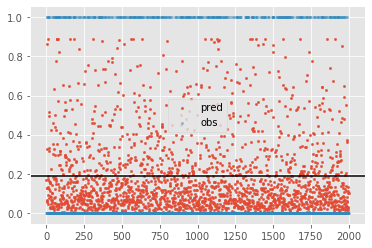

In [9]:
# Membuat prediksi terhadap data test set
y_pred = classifier.predict(X_test)

# plot probability setiap prediksi dengan observed labelnya 
plt.figure()
plt.scatter(range(0, len(y_pred)), y_pred, s=5, label='pred')
plt.scatter(range(0, len(y_test)), y_test, s=5, alpha=0.5, label='obs')
plt.axhline(np.average(y_pred), color='k')
plt.legend()

In [10]:
# menentukan threshold / cut off untuk membuat probability menjadi biner
y_pred = (y_pred > 0.5)

# membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# menghitung performa model menggunakan metrik akurasi
correct_pred = cm[0, 0] + cm[1, 1]
wrong_pred = cm[0, 1] + cm[1, 0]
pred_accuracy = correct_pred / (correct_pred + wrong_pred)